# Scrape and Visualize Stock Screener
**Jupyter notebook that scrapes stocks data from Screener.in and creates charts.**

# 1. Part-1: Scraping Data and generating Report: 

* Sheet 1: Top Ratios 
* Sheet 2: Quarterly Results
* Sheet 3: Profit & Loss
* Sheet 4: Compounded Sales Growth
* Sheet 5: Compounded Profit Growth
* Sheet 6: Stock Price CAGR 
* Sheet 7: Return on Equity
* Sheet 8: Balance Sheet
* Sheet 9: Cash Flows
* Sheet 10: Ratios
* Sheet 11: Shareholdin
ng Pattern

## 1.1 Imports & Predefined functions: 

In [71]:
import requests as rq
import pandas as pd 
import time
import datetime
from bs4 import BeautifulSoup
import re
import os


### 1.1.1 Function that transforms Unordered list to dataframe: 

In [72]:
def csvfy(lines):
    import re

    # Line - 0
    if m := re.match(r"Market Cap ₹ ([0-9,.-]+) Cr.", lines[0]):
        line_0 = m.group(1).replace(',','')
    else: 
        line_0 = "NaN"

    # Line - 1
    if m := re.match(r"Current Price ₹ ([0-9,.-]+)", lines[1]):
        line_1 = m.group(1).replace(',','')
    else: 
        line_1 = "NaN"

    # Line - 2a
    if m := re.match(r"High \/ Low ₹ ([0-9,..-]+) \/ ([0-9,.]+)", lines[2]):
        line_2a = m.group(1).replace(',','')
    else: 
        line_2a = "NaN"

    # Line - 2b
    if m := re.match(r"High \/ Low ₹ ([0-9,.-]+) \/ ([0-9,.]+)", lines[2]):
        line_2b = m.group(2).replace(',','')
    else: 
        line_2b = "NaN"

    # Line - 3
    if m := re.match(r"Stock P\/E ([0-9,.-]+)", lines[3]):
        line_3 = m.group(1).replace(',','')
    else: 
        line_3 = "NaN"

    # Line - 4
    if m := re.match(r"Book Value ₹ ([0-9,.-]+)", lines[4]):
        line_4 = m.group(1).replace(',','')
    else: 
        line_4 = "NaN"

    # Line - 5
    if m := re.match(r"Dividend Yield ([0-9,.-]+) %", lines[5]):
        line_5 = m.group(1).replace(',','')
    else: 
        line_5 = "NaN"

    # Line - 6
    if m := re.match(r"ROCE ([0-9,.-]+) %", lines[6]):
        line_6 = m.group(1).replace(',','')
    else: 
        line_6 = "NaN"

    # Line - 7
    if m := re.match(r"ROE ([0-9,.-]+) %", lines[7]):
        line_7 = m.group(1).replace(',','')
    else: 
        line_7 = "NaN"

    # Line - 8
    if m := re.match(r"Face Value ₹ ([0-9,.-]+)", lines[8]):
        line_8 = m.group(1).replace(',','')
    else: 
        line_8 = "NaN"

    x = [{
    "Market Cap in Cores Rupees":line_0,
    "Current Price in Rupees":line_1,
    "High in Rupees":line_2a,
    "Low in Rupees":line_2b,
    "Stock PE":line_3,
    "Book Value in Rupees":line_4,
    "Dividend Yield %": line_5,
    "ROCE %":line_6,
    "ROE %":line_7,
    "Face Value in Rupees":line_8,
    }]

    df = pd.DataFrame(x)

    return df.copy()

## 1.2 Enter URL: 

>  ⚠️ <span style="color:red"> **Update the correct Screener.in URL for the stock:**</span>

Instructions: 
1. Visit [Screener.in](https://www.screener.in/)
2. Find & copy the correct stock url from search. Also, copy the Stock Symbol.
3. Paste it here.

> Note: Some stock urls have _/consolidated/_ at the end so be careful. Don't omit.    

In [73]:

stock_screener_url = "https://www.screener.in/company/RADICO/"

stock_symbol = "RADICO" 


## 1.3 Scrape stock data: 

In [74]:
writer = None
dir_path = "../Output/IndividualStocks/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+"/"


if not os.path.exists(dir_path):
    os.makedirs(dir_path)

## Read entire page using Pandas

print("Loading Page for ",stock_symbol)
tables = pd.read_html(stock_screener_url)

time.sleep(1) # Seconds

# Read the Top Ration. Top Ratios section is a List Item, not a table hence need 
# to parse manually usiang bsoup 
response = rq.get(stock_screener_url)
# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")
# Find the unordered list
ul = soup.find("ul#top-ratios")  # You might need to use a more specific selector like ul.my-list
lines = []
for ul in soup.findAll('ul', id='top-ratios'):
    for li in ul.findAll('li'):
        li_parsed_text = li.text
        li_parsed_text = re.sub('[\s ]+', ' ', li_parsed_text)
        li_parsed_text = li_parsed_text.strip()
        #print(li_parsed_text)
        lines.append(li_parsed_text)
   
time.sleep(1) # Seconds


# Get all Tables in separate dataframes
df_top_ratios               = csvfy(lines) # Call function
df_quaterly_results         = tables[0] # Quarterly Results
df_profit_n_loss            = tables[1] # Profit & Loss
df_compounded_sales_growth  = tables[2] # Compounded Sales Growth
df_compounded_profit_growth = tables[3] # Compounded Profit Growth
df_stock_price_cagr         = tables[4] # Stock Price CAGR
df_return_on_equity         = tables[5] # Return on Equity
df_balance_sheet            = tables[6] # Balance Sheet
df_cash_flows               = tables[7] # Cash Flows
df_ratios                   = tables[8] # Ratios
df_shareholding_pattern     = tables[9] # Shareholding Pattern

# Cleanup table: Quarterly Results
df_quaterly_results.rename(columns={'Unnamed: 0':'Quarterly Results'}, inplace=True)
df_quaterly_results.replace(u"\u00A0\+", "", regex=True,inplace=True) 

# Cleanup table: Profit & Loss
df_profit_n_loss.rename(columns={'Unnamed: 0':'Profit and Loss'}, inplace=True)
df_profit_n_loss.replace(u"\u00A0\+", "", regex=True,inplace=True) 

# Cleanup table: Compounded Sales Growth
df_compounded_sales_growth.replace(":", "", regex=True,inplace=True) 

# Cleanup table: Compounded Profit Growth
df_compounded_profit_growth.replace(":", "", regex=True,inplace=True) 

# Cleanup table: Stock Price CAGR
df_stock_price_cagr.replace(":", "", regex=True,inplace=True) 

# Cleanup table: Return on Equity
df_return_on_equity.replace(":", "", regex=True,inplace=True) 

# Cleanup table: Balance Sheet
df_balance_sheet.rename(columns={'Unnamed: 0':'Balance Sheet'}, inplace=True)
df_balance_sheet.replace(u"\u00A0\+", "", regex=True,inplace=True) 

# Cleanup table: Cash Flows
df_cash_flows.rename(columns={'Unnamed: 0':'Cash Flows'}, inplace=True)
df_cash_flows.replace(u"\u00A0\+", "", regex=True,inplace=True) 

# Cleanup table: Ratios
df_ratios.rename(columns={'Unnamed: 0':'Ratios'}, inplace=True)

# Cleanup table: Shareholding Pattern
df_shareholding_pattern.rename(columns={'Unnamed: 0':'Shareholding Pattern'}, inplace=True)
df_shareholding_pattern.replace(u"\u00A0\+", "", regex=True,inplace=True)


sheet_names = ["Top Ratios","Quarterly Results", "Profit & Loss", "Compounded Sales Growth", "Compounded Profit Growth", 
               "Stock Price CAGR", "Return on Equity", "Balance Sheet", "Cash Flows", "Ratios", "Shareholding Pattern"]
dataframes  = [df_top_ratios, df_quaterly_results, df_profit_n_loss , df_compounded_sales_growth, df_compounded_profit_growth, 
               df_stock_price_cagr, df_return_on_equity, df_balance_sheet, df_cash_flows, df_ratios, df_shareholding_pattern]

writer = pd.ExcelWriter(dir_path + stock_symbol + ".xlsx" , engine='xlsxwriter')
for i, frame in enumerate(dataframes):
    frame.to_excel(writer, sheet_name = sheet_names[i], index=False)
writer.close()
writer.handles = None

print("Finished. Report Generated:", (dir_path + stock_symbol + ".xlsx") )

stock_report_file = "" + dir_path + stock_symbol + ".xlsx"

Loading Page for  RADICO
Finished. Report Generated: ../Output/IndividualStocks/20240819-175815/RADICO.xlsx


# 2. Part-2. Begin Data Visualization: 

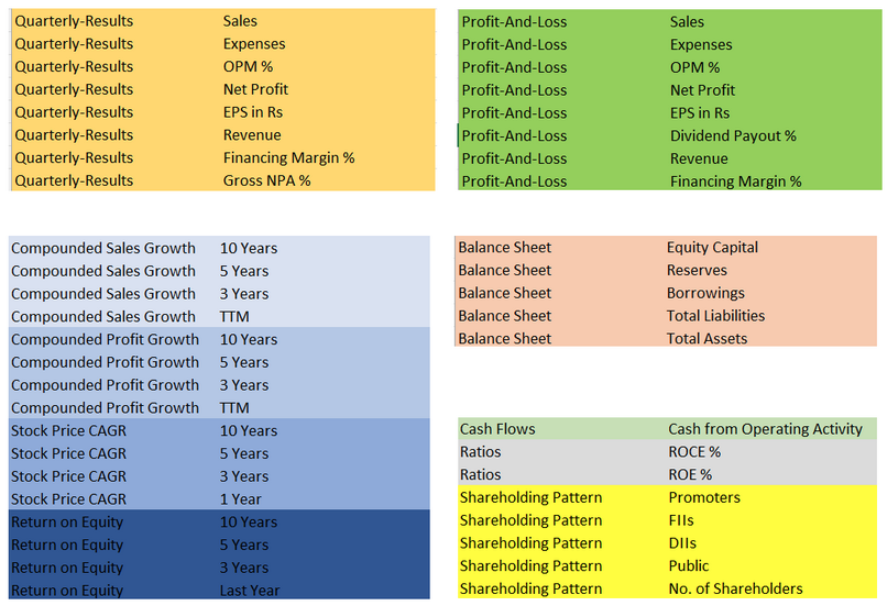

## 2.1 Imports:

In [75]:
import plotly.offline as pyo 
import plotly.graph_objects as go

## 2.2 Functions to transform dataframe: 

In [76]:
def sort_columns_chrono(temp_df):
    date = '1970-01-01'
    temp_df = temp_df.sort_index(axis=1, key=lambda x: pd.to_datetime(x, errors='coerce', format='mixed').fillna(date))
    return temp_df.copy()

def transpose_reset_index(temp_df,colname_before,colname_after):
    temp_df = temp_df.rename(columns={colname_before: colname_after})
    temp_df = temp_df.set_index(colname_after).T
    return temp_df.copy()

# Define One more function to handle Finanace stocks 

def fix_banks_nbfc_df(temp_df):
    # Revenue --> Sales
    temp_df['Quarterly Results'] = temp_df['Quarterly Results'].str.replace('Revenue', 'Sales')
    # Financing Profit  --> Operating Profit
    temp_df['Quarterly Results'] = temp_df['Quarterly Results'].str.replace('Financing Profit', 'Operating Profit')
    return temp_df.copy()



In [77]:
xls = pd.ExcelFile(stock_report_file)

df_top_ratios               = pd.read_excel(xls, 'Top Ratios') # Top Ratios
df_quaterly_results         = pd.read_excel(xls, 'Quarterly Results') # Quarterly Results
df_profit_n_loss            = pd.read_excel(xls, 'Profit & Loss') # Profit & Loss
df_compounded_sales_growth  = pd.read_excel(xls, 'Compounded Sales Growth') # Compounded Sales Growth
df_compounded_profit_growth = pd.read_excel(xls, 'Compounded Profit Growth') # Compounded Profit Growth
df_stock_price_cagr         = pd.read_excel(xls, 'Stock Price CAGR') # Stock Price CAGR
df_return_on_equity         = pd.read_excel(xls, 'Return on Equity') # Return on Equity
df_balance_sheet            = pd.read_excel(xls, 'Balance Sheet') # Balance Sheet
df_cash_flows               = pd.read_excel(xls, 'Cash Flows') # Cash Flows
df_ratios                   = pd.read_excel(xls, 'Ratios') # Ratios
df_shareholding_pattern     = pd.read_excel(xls, 'Shareholding Pattern') # Shareholding Pattern


## 2.3 Function call transform dataframe: 

In [78]:
df_quaterly_results = fix_banks_nbfc_df(df_quaterly_results) 
df_quaterly_results = sort_columns_chrono(df_quaterly_results)
df_quaterly_results = transpose_reset_index(df_quaterly_results,'Quarterly Results','Quarter')


df_quaterly_results.head(2)

Quarter,Sales,Expenses,Operating Profit,OPM %,Other Income,Interest,Depreciation,Profit before tax,Tax %,Net Profit,EPS in Rs,Raw PDF
Jun 2021,598,506,92,15%,6,5,15,78,23%,60,4.48,NaN
Sep 2021,709,597,111,16%,2,3,16,94,26%,69,5.18,NaN


## 2.4 Quaterly Result - Sales, Expenses, Operating Profit, and Net Profit Trend:

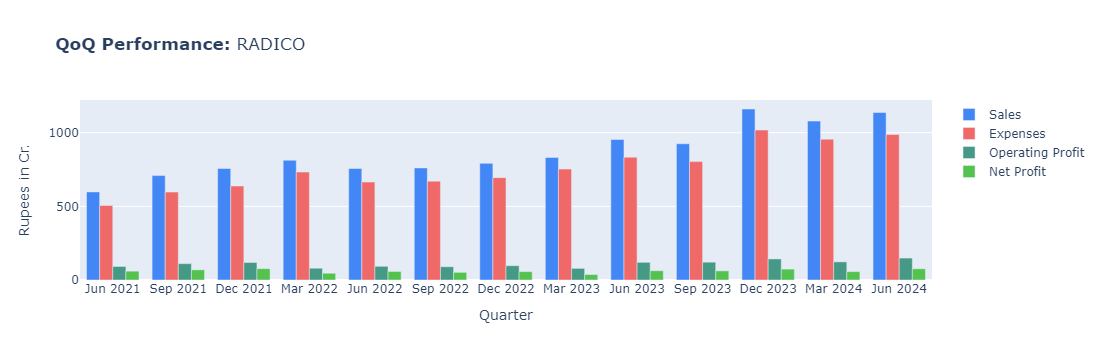

In [79]:
## Charting
fig1 = go.Figure()

x  = df_quaterly_results.index
y1 = df_quaterly_results['Sales'].astype(int) # Sales Column
y2 = df_quaterly_results['Expenses'].astype(int) # Expenses Column
y3 = df_quaterly_results['Operating Profit'].astype(int) # Expenses Column
y4 = df_quaterly_results['Net Profit'].astype(int) # Expenses Column

fig1.add_trace(go.Bar(x=x, y=y1, name='Sales', marker_color ="#4287f5"))
fig1.add_trace(go.Bar(x=x, y=y2, name='Expenses', marker_color ="#f06969"))
fig1.add_trace(go.Bar(x=x, y=y3, name='Operating Profit', marker_color ="#469984"))
fig1.add_trace(go.Bar(x=x, y=y4, name='Net Profit', marker_color ="#53c24f"))

plot_title = '<b>QoQ Performance: </b>' + stock_symbol

fig1.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='Rupees in Cr.')

#fig.update_traces(marker_color='green')

# pyo.plot(fig, filename="temp-plot.html")
fig1.show()

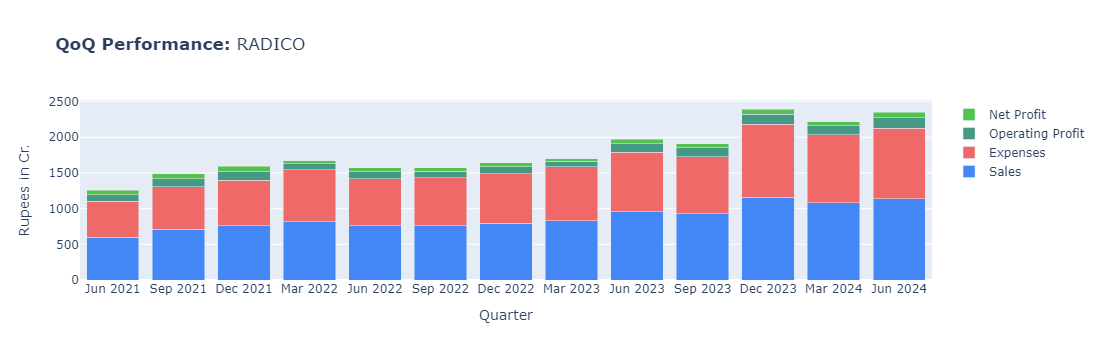

In [80]:
## Charting
fig1 = go.Figure()

x  = df_quaterly_results.index
y1 = df_quaterly_results['Sales'].astype(int) # Sales Column
y2 = df_quaterly_results['Expenses'].astype(int) # Expenses Column
y3 = df_quaterly_results['Operating Profit'].astype(int) # Expenses Column
y4 = df_quaterly_results['Net Profit'].astype(int) # Expenses Column

fig1.add_trace(go.Bar(x=x, y=y1, name='Sales', marker_color ="#4287f5"))
fig1.add_trace(go.Bar(x=x, y=y2, name='Expenses', marker_color ="#f06969"))
fig1.add_trace(go.Bar(x=x, y=y3, name='Operating Profit', marker_color ="#469984"))
fig1.add_trace(go.Bar(x=x, y=y4, name='Net Profit', marker_color ="#53c24f"))

plot_title = '<b>QoQ Performance: </b>' + stock_symbol

fig1.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='Rupees in Cr.',
        barmode = 'stack')

#fig.update_traces(marker_color='green')

# pyo.plot(fig, filename="temp-plot.html")
fig1.show()